In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
plt.rcParams['font.family']='d2coding'
plt.rcParams['axes.unicode_minus']=False

# 데이터 준비 및 확인
* 기상자료개방포털 > 데이터 > 기상관측 > 지상 > 종관기상관측(ASOS)<br>
https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36<br>
[ 자료형태 ] 일자료<br>
[ 지점 ] 전체<br>
[ 자료 ] 기온>최저,최고,평균<br>
[ 기간 ] 1911~2020 (10년단위로 나누어 다운로드)


## 데이터프레임 생성

In [5]:
df_1911 = pd.read_csv('data/1911-1920 일별 기온.csv', encoding='cp949')
df_1921 = pd.read_csv('data/1921-1930 일별 기온.csv', encoding='cp949')
df_1931 = pd.read_csv('data/1931-1940 일별 기온.csv', encoding='cp949')
df_1941 = pd.read_csv('data/1941-1950 일별 기온.csv', encoding='cp949')
df_1951 = pd.read_csv('data/1951-1960 일별 기온.csv', encoding='cp949')
df_1961 = pd.read_csv('data/1961-1970 일별 기온.csv', encoding='cp949')
df_1971 = pd.read_csv('data/1971-1980 일별 기온.csv', encoding='cp949')
df_1981 = pd.read_csv('data/1981-1990 일별 기온.csv', encoding='cp949')
df_1991 = pd.read_csv('data/1991-2000 일별 기온.csv', encoding='cp949')
df_2001 = pd.read_csv('data/2001-2010 일별 기온.csv', encoding='cp949')
df_2011 = pd.read_csv('data/2011-2020 일별 기온.csv', encoding='cp949')

In [6]:
# 데이터프레임 연결하기
df = pd.concat([df_1911,df_1921,df_1931,df_1941,df_1951,df_1961,df_1971,df_1981,df_1991,df_2001,df_2011]
              ,ignore_index=True)

In [7]:
df.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,105,강릉,1911-10-04,NaN,12.2,26.2
1,105,강릉,1911-10-09,NaN,6.0,16.6
2,105,강릉,1911-10-16,NaN,9.2,15.5
3,105,강릉,1911-11-01,NaN,6.0,14.8
4,105,강릉,1911-11-04,NaN,10.2,19.5


In [8]:
df.tail()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1597071,295,남해,2020-12-27,4.4,2.5,6.0
1597072,295,남해,2020-12-28,4.7,1.1,11.5
1597073,295,남해,2020-12-29,5.4,1.0,11.2
1597074,295,남해,2020-12-30,-3.0,-5.4,1.6
1597075,295,남해,2020-12-31,-1.3,-7.4,2.8


## 데이터 확인

In [9]:
df.shape

(1597076, 6)

In [10]:
df['지점명'].unique()

array(['강릉', '서울', '인천', '대구', '전주', '부산', '목포', '제주', '울릉도', '추풍령', '광주',
       '포항', '울산', '여수', '속초', '춘천', '수원', '서산', '청주', '대전', '군산', '통영',
       '서귀포', '진주', '임실', '정읍', '대관령', '원주', '충주', '울진', '안동', '완도', '성산',
       '강화', '양평', '이천', '인제', '홍천', '삼척', '제천', '보은', '천안', '보령', '부여',
       '금산', '부안', '남원', '고창군', '주암', '장흥', '해남', '고흥', '성산포', '영주', '문경',
       '영덕', '의성', '구미', '영천', '거창', '합천', '밀양', '산청', '거제', '남해', '철원',
       '관악산', '창원', '고산', '태백', '장수', '봉화', '동두천', '백령도', '동해', '영월',
       '무안', '흑산도', '파주', '북강릉', '상주', '고창', '진도(첨찰산)', '정선군', '영광군',
       '김해시', '순창군', '북창원', '양산시', '보성군', '강진군', '의령군', '함양군', '청송군',
       '경주시', '북춘천', '순천', '대구(기)', '홍성', '세종', '광양시', '진도군'],
      dtype=object)

In [11]:
df['지점명'].nunique()

102

## 데이터타입 확인/변경

In [12]:
df.dtypes

지점            int64
지점명          object
일시           object
평균기온(°C)    float64
최저기온(°C)    float64
최고기온(°C)    float64
dtype: object

In [13]:
df['일시'] = pd.to_datetime(df['일시'])

In [14]:
df.dtypes

지점                   int64
지점명                 object
일시          datetime64[ns]
평균기온(°C)           float64
최저기온(°C)           float64
최고기온(°C)           float64
dtype: object

## 2020년 지점별 기온 데이터 추출 및 전처리

### 2020년 기온 데이터 추출하여 서브셋 만들기
* 조건으로 데이터를 추출한다.
* 필요한 컬럼을 추출한다.
* .copy()를 사용하여 카피본으로 서브셋을 만든다.

In [15]:
# 서브셋 만들기

df2020 = df[df['일시'].dt.year==2020].copy()
df2020

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1257373,90,속초,2020-01-01,0.8,-3.4,4.8
1257374,90,속초,2020-01-02,2.8,-2.1,6.6
1257375,90,속초,2020-01-03,4.7,0.8,8.5
1257376,90,속초,2020-01-04,4.0,1.1,8.1
1257377,90,속초,2020-01-05,3.1,-0.6,8.8
...,...,...,...,...,...,...
1597071,295,남해,2020-12-27,4.4,2.5,6.0
1597072,295,남해,2020-12-28,4.7,1.1,11.5
1597073,295,남해,2020-12-29,5.4,1.0,11.2
1597074,295,남해,2020-12-30,-3.0,-5.4,1.6


In [16]:
# 지점별 데이터 개수 카운트

df2020['지점명'].value_counts()

지점명
속초     366
세종     366
순창군    366
김해시    366
영광군    366
      ... 
군산     366
포항     366
남해     366
북창원    365
진도군    364
Name: count, Length: 95, dtype: int64

### 결측치 확인

In [17]:
# 컬럼별 결측치 개수 확인

df2020.isnull().sum()

지점           0
지점명          0
일시           0
평균기온(°C)    36
최저기온(°C)     0
최고기온(°C)     1
dtype: int64

In [18]:
# 결측치 데이터 확인

df2020[df2020['평균기온(°C)'].isnull() | df2020['최고기온(°C)'].isnull()]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1324913,130,울진,2020-08-23,NaN,22.1,27.9
1335898,135,추풍령,2020-09-18,NaN,13.8,23.7
1335905,135,추풍령,2020-09-25,NaN,11.6,23.6
1350354,140,군산,2020-04-15,NaN,4.7,17.0
1350584,140,군산,2020-12-01,NaN,-1.5,8.4
1394404,172,고창,2020-11-19,NaN,11.5,22.2
1397661,174,순천,2020-01-18,NaN,-1.7,4.1
1436214,211,인제,2020-02-20,NaN,-2.7,9.8
1447150,217,정선군,2020-01-30,NaN,-1.2,6.1
1461944,235,보령,2020-07-30,NaN,22.9,26.3


In [19]:
# 결측치가 있는 데이터의 지점별 카운팅

df2020[df2020['평균기온(°C)'].isnull() | df2020['최고기온(°C)'].isnull()]['지점명'].value_counts()

지점명
의령군    5
함양군    3
남원     3
군산     2
추풍령    2
해남     2
울진     1
영천     1
구미     1
의성     1
영덕     1
청송군    1
영주     1
진도군    1
광양시    1
양산시    1
북창원    1
정읍     1
임실     1
보령     1
정선군    1
인제     1
순천     1
고창     1
거제     1
Name: count, dtype: int64

In [20]:
# 결측치 제거

df2020.dropna(inplace=True)

In [21]:
# 결측치 잘 제거되었는지 확인

df2020.isnull().sum()

지점          0
지점명         0
일시          0
평균기온(°C)    0
최저기온(°C)    0
최고기온(°C)    0
dtype: int64

In [22]:
# 지점별 데이터 개수 확인

df2020['지점명'].value_counts()

지점명
속초     366
완도     366
금산     366
부여     366
천안     366
      ... 
군산     364
진도군    363
함양군    363
남원     363
의령군    361
Name: count, Length: 95, dtype: int64

# 지점별 연평균 기온 시각화
* 연 평균기온이 높은 지역은 어디일까?
* 연 평균기온이 낮은 지역은 어디일까?
* 서울의 연 평균기온은 전국에서 어느정도 위치에 해당할까?

## 2020년도 지점별 연 평균기온 추출
* 지점별 연간 일 평균기온의 평균 계산<br>
지점명으로 그룹핑하여 일평균기온의 평균 계산

In [23]:
df2020.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1257373,90,속초,2020-01-01,0.8,-3.4,4.8
1257374,90,속초,2020-01-02,2.8,-2.1,6.6
1257375,90,속초,2020-01-03,4.7,0.8,8.5
1257376,90,속초,2020-01-04,4.0,1.1,8.1
1257377,90,속초,2020-01-05,3.1,-0.6,8.8


In [24]:
mean2020 = df2020.groupby('지점명')['평균기온(°C)'].mean().sort_values(ascending=False)
mean2020

지점명
서귀포    16.770219
제주     16.744809
고산     16.076503
성산     15.981148
북창원    15.206593
         ...    
철원     10.976776
제천     10.973497
봉화     10.821038
태백      9.631421
대관령     7.787978
Name: 평균기온(°C), Length: 95, dtype: float64

## 시각화

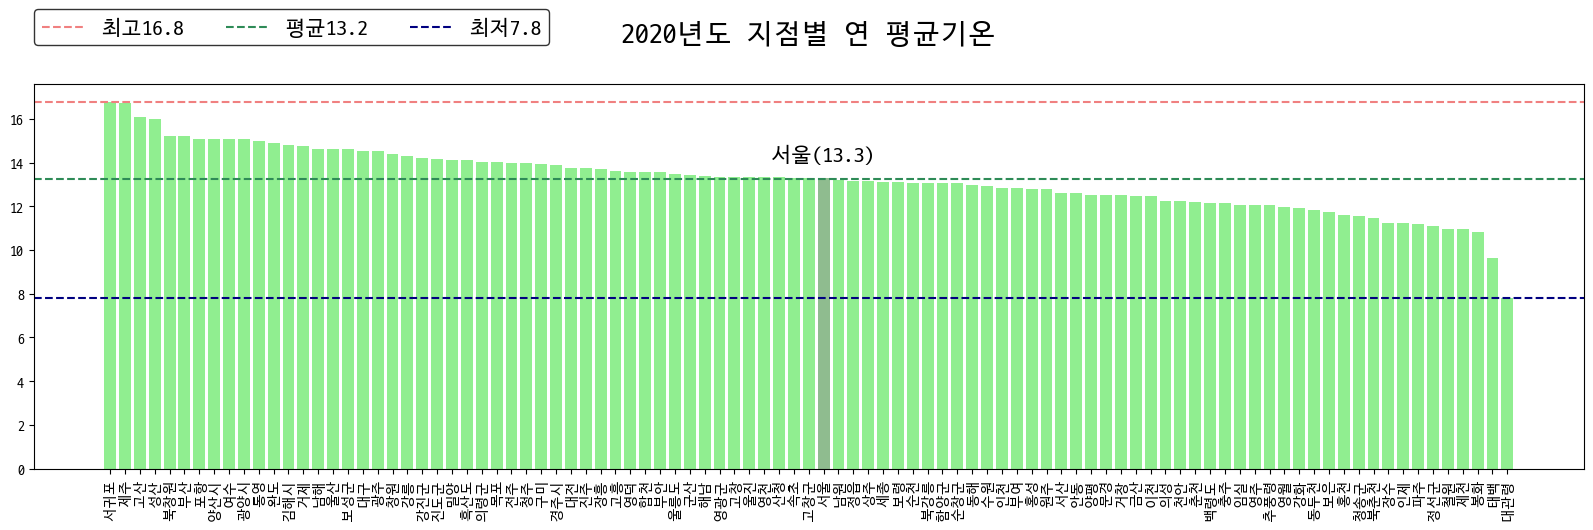

In [25]:
# 지점별 연 평균기온
plt.figure(figsize=(20,5))
plt.bar(mean2020.index, mean2020.values, color='lightgreen')
plt.xticks(rotation=90)

# 최고, 평균, 최저 라인 표시
plt.axhline(mean2020.max(), ls='--', c='lightcoral', label='최고'+str(round(mean2020.max(),1)))
plt.axhline(mean2020.mean(), ls='--', c='seagreen', label='평균'+str(round(mean2020.mean(),1)))
plt.axhline(mean2020.min(), ls='--', c='navy', label='최저'+str(round(mean2020.min(),1)))
plt.legend(fontsize=15, loc=(0, 1.1), ncol=3, edgecolor='k')

# 서울지역 표시
plt.bar('서울', mean2020.loc['서울'], color='darkseagreen')
plt.text('서울', mean2020.loc['서울']+0.8, s='서울('+str(round(mean2020.loc['서울'],1))+')'
        , ha='center', size=15)

plt.title('2020년도 지점별 연 평균기온', size=20, pad=30)
plt.show()

# 지점별 연 최저기온, 최고기온 시각화

* 연 최저기온이 높은 지역은 어디일까?
* 연 최저기온이 낮은 지역은 어디일까?
* 서울의 연 최저기온은 전국에서 어느정도 위치에 해당할까?

## 지점별 연 최저기온

### 지점별 연 최저기온 추출

In [26]:
# 지점명으로 그룹화하여 지점별 연 최저기온 추출

min2020 = df2020.groupby('지점명')['최저기온(°C)'].min().sort_values(ascending=False)
min2020

지점명
제주     -1.4
고산     -1.4
서귀포    -2.1
성산     -2.8
흑산도    -3.3
       ... 
홍천    -18.2
북춘천   -18.5
철원    -18.8
제천    -20.3
대관령   -24.0
Name: 최저기온(°C), Length: 95, dtype: float64

### 시각화

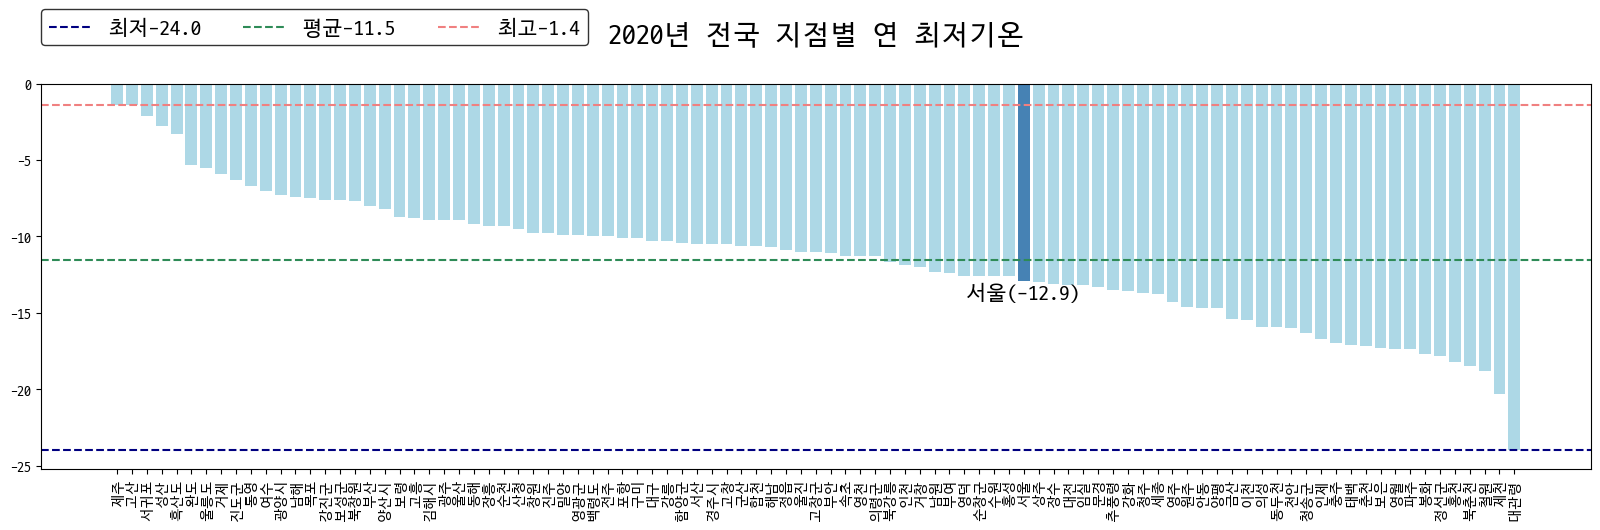

In [27]:
# 지점별 연 최저기온
plt.figure(figsize=(20,5))
plt.bar(min2020.index, min2020.values, color='lightblue')
plt.xticks(rotation=90)

# 최저, 평균, 최고지점 표시
plt.axhline(min2020.min(), ls='--', color='navy', label='최저'+str(round(min2020.min(),1)))
plt.axhline(min2020.mean(), ls='--', color='seagreen', label='평균'+str(round(min2020.mean(),1)))
plt.axhline(min2020.max(), ls='--', color='lightcoral', label='최고'+str(round(min2020.max(),1)))
plt.legend(ncol=3, loc=(0,1.1), edgecolor='k', fontsize=15)

# 서울 표시
plt.bar('서울', min2020.loc['서울'], color='steelblue')
plt.text('서울', min2020.loc['서울']-1.2, '서울('+str(round(min2020.loc['서울'],1))+')', 
         ha='center', size=15)

plt.title('2020년 전국 지점별 연 최저기온', size=20, pad=30)
plt.show()

## 지점별 연 최고기온

### 지점별 연 최고기온 추출

In [28]:
# 지점명으로 그룹화하여 지점별 연 최고기온 추출

max2020 = df2020.groupby('지점명')['최고기온(°C)'].max().sort_values(ascending=False)
max2020

지점명
양산시    37.8
대구     37.0
경주시    36.9
포항     36.9
북창원    36.9
       ... 
여수     32.6
울릉도    32.0
대관령    31.6
서귀포    31.3
백령도    30.5
Name: 최고기온(°C), Length: 95, dtype: float64

### 시각화

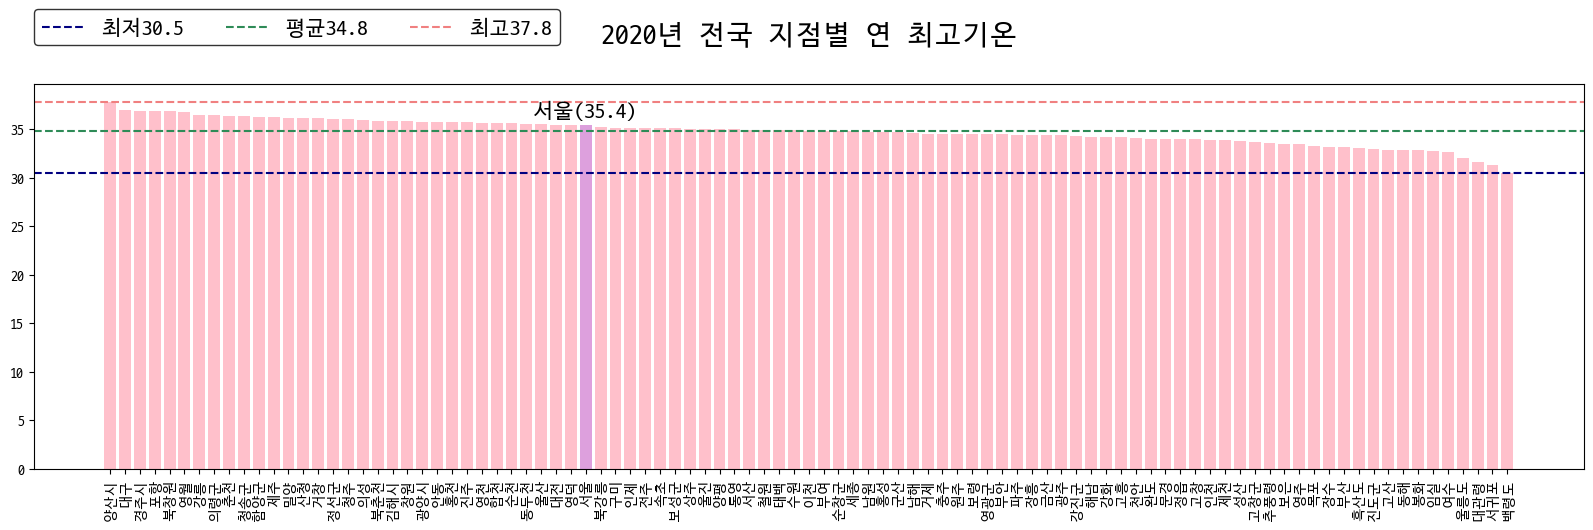

In [29]:
# 지점별 연 최고기온
plt.figure(figsize=(20,5))
plt.bar(max2020.index, max2020.values, color='pink')
plt.xticks(rotation=90)

# 최저, 평균, 최고지점 표시
plt.axhline(max2020.min(), ls='--', color='navy', label='최저'+str(round(max2020.min(),1)))
plt.axhline(max2020.mean(), ls='--', color='seagreen', label='평균'+str(round(max2020.mean(),1)))
plt.axhline(max2020.max(), ls='--', color='lightcoral', label='최고'+str(round(max2020.max(),1)))
plt.legend(ncol=3, loc=(0,1.1), edgecolor='k', fontsize=15)

# 서울 표시
plt.bar('서울', max2020.loc['서울'], color='plum')
plt.text('서울', max2020.loc['서울']+0.8, '서울('+str(round(max2020.loc['서울'],1))+')', 
         ha='center', size=15)

plt.title('2020년 전국 지점별 연 최고기온', size=20, pad=30)
plt.show()

# 지점별 기온 분포 시각화 - 히스토그램

## 서귀포, 서울, 대관령 서브셋 만들기

In [30]:
# 서귀포 서브셋

sgp2020 = df2020[df2020['지점명']=='서귀포'].copy()
sgp2020

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1417900,189,서귀포,2020-01-01,7.0,4.8,9.6
1417901,189,서귀포,2020-01-02,8.7,5.6,12.7
1417902,189,서귀포,2020-01-03,9.5,6.1,13.4
1417903,189,서귀포,2020-01-04,9.7,6.2,14.0
1417904,189,서귀포,2020-01-05,9.6,6.1,12.8
...,...,...,...,...,...,...
1418261,189,서귀포,2020-12-27,10.9,9.9,11.9
1418262,189,서귀포,2020-12-28,11.7,7.9,15.5
1418263,189,서귀포,2020-12-29,12.5,9.9,15.2
1418264,189,서귀포,2020-12-30,0.7,-2.1,10.0


In [31]:
# 서울 서브셋

seoul2020 = df2020[df2020['지점명']=='서울'].copy()
seoul2020

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1295456,108,서울,2020-01-01,-2.2,-6.5,0.3
1295457,108,서울,2020-01-02,1.0,-0.7,3.8
1295458,108,서울,2020-01-03,-0.1,-3.4,4.6
1295459,108,서울,2020-01-04,1.2,-2.8,6.1
1295460,108,서울,2020-01-05,1.3,-3.2,6.6
...,...,...,...,...,...,...
1295817,108,서울,2020-12-27,5.8,1.4,10.0
1295818,108,서울,2020-12-28,6.7,4.2,11.4
1295819,108,서울,2020-12-29,0.1,-6.2,4.3
1295820,108,서울,2020-12-30,-10.9,-12.9,-6.2


In [32]:
# 대관령 서브셋

dgr2020 = df2020[df2020['지점명']=='대관령'].copy()
dgr2020

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1273538,100,대관령,2020-01-01,-6.5,-11.5,-2.5
1273539,100,대관령,2020-01-02,-4.4,-9.0,-0.4
1273540,100,대관령,2020-01-03,-3.2,-7.4,2.5
1273541,100,대관령,2020-01-04,-4.2,-9.9,1.6
1273542,100,대관령,2020-01-05,-5.5,-14.2,4.6
...,...,...,...,...,...,...
1273899,100,대관령,2020-12-27,-1.1,-4.2,5.3
1273900,100,대관령,2020-12-28,1.0,-4.9,8.0
1273901,100,대관령,2020-12-29,-3.0,-8.0,4.5
1273902,100,대관령,2020-12-30,-14.2,-18.3,-5.4


## 서귀포, 서울, 대관령 일 평균기온 히스토그램

In [33]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

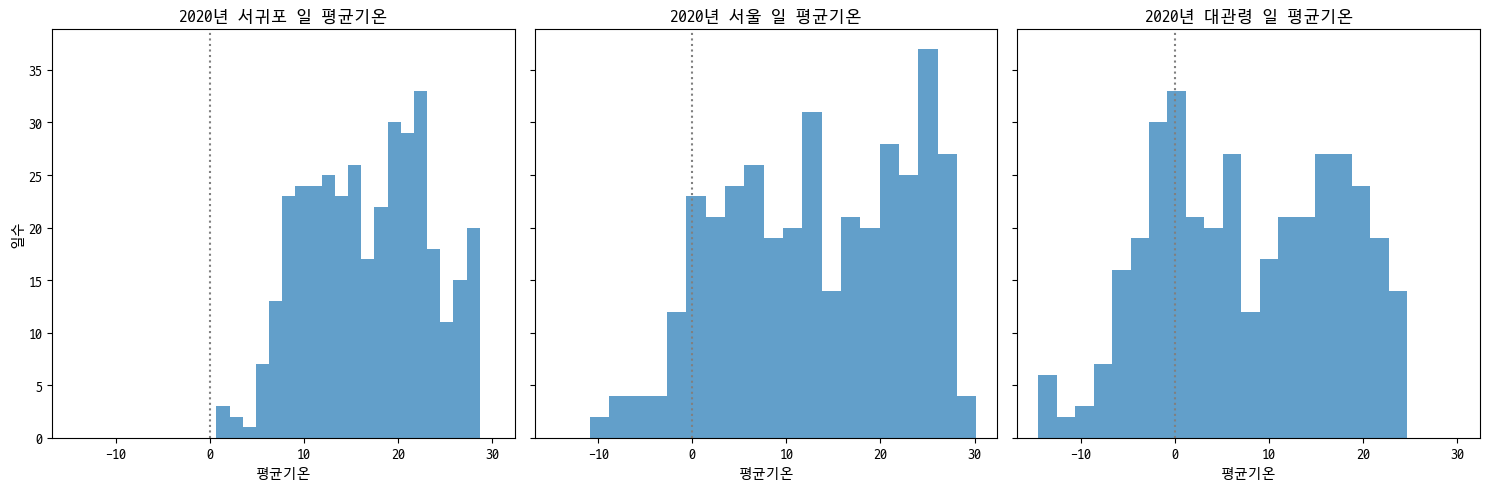

In [34]:
# 스타일 파라미터
plt.rcParams['hatch.color']='k'


# 서브플롯 만들기(plt.subplots())
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)  # x, y축 똑같게

# 서귀포 일평균기온 히스토그램
ax[0].hist(sgp2020['평균기온(°C)'], bins=20, alpha=0.7)
ax[0].set_title('2020년 서귀포 일 평균기온')
ax[0].set_xlabel('평균기온')
ax[0].set_ylabel('일수')


# 서울 일평균기온 히스토그램
ax[1].hist(seoul2020['평균기온(°C)'], bins=20, alpha=0.7)
ax[1].set_title('2020년 서울 일 평균기온')
ax[1].set_xlabel('평균기온')


# 대관령
ax[2].hist(dgr2020['평균기온(°C)'], bins=20, alpha=0.7)
ax[2].set_title('2020년 대관령 일 평균기온')
ax[2].set_xlabel('평균기온')


# 0°C 수직선 표시
ax[0].axvline(0, c='gray', ls=':')
ax[1].axvline(0, c='gray', ls=':')
ax[2].axvline(0, c='gray', ls=':')

plt.tight_layout()  # 간격 최적화
plt.show()

# 지점별 기온분포 시각화 - 박스플롯, 바이올린플롯
* 서귀포, 서울, 대관령 지점 2020년 평균기온 서브셋

In [35]:
sgp2020.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1417900,189,서귀포,2020-01-01,7.0,4.8,9.6
1417901,189,서귀포,2020-01-02,8.7,5.6,12.7
1417902,189,서귀포,2020-01-03,9.5,6.1,13.4
1417903,189,서귀포,2020-01-04,9.7,6.2,14.0
1417904,189,서귀포,2020-01-05,9.6,6.1,12.8


In [36]:
seoul2020.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1295456,108,서울,2020-01-01,-2.2,-6.5,0.3
1295457,108,서울,2020-01-02,1.0,-0.7,3.8
1295458,108,서울,2020-01-03,-0.1,-3.4,4.6
1295459,108,서울,2020-01-04,1.2,-2.8,6.1
1295460,108,서울,2020-01-05,1.3,-3.2,6.6


In [37]:
dgr2020.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1273538,100,대관령,2020-01-01,-6.5,-11.5,-2.5
1273539,100,대관령,2020-01-02,-4.4,-9.0,-0.4
1273540,100,대관령,2020-01-03,-3.2,-7.4,2.5
1273541,100,대관령,2020-01-04,-4.2,-9.9,1.6
1273542,100,대관령,2020-01-05,-5.5,-14.2,4.6


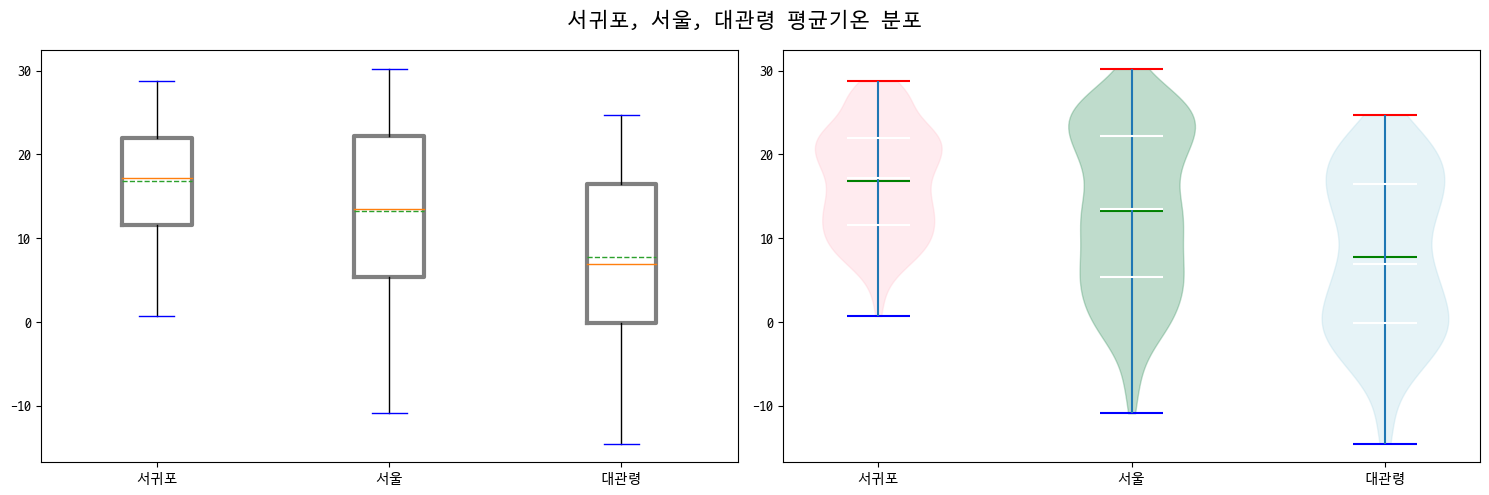

In [39]:
# 서브플롯 그리기
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 박스플롯
plt.rcParams['boxplot.boxprops.color']='gray'
plt.rcParams['boxplot.boxprops.linewidth']=3
plt.rcParams['boxplot.capprops.color']='blue'
plt.rcParams['boxplot.meanline']=True


ax1.boxplot([sgp2020['평균기온(°C)'], seoul2020['평균기온(°C)'], dgr2020['평균기온(°C)']],
           labels=['서귀포', '서울', '대관령'], showmeans=True)
# 바이올린플롯
v = ax2.violinplot([sgp2020['평균기온(°C)'], seoul2020['평균기온(°C)'], dgr2020['평균기온(°C)']],
           showmeans=True, showmedians=True, quantiles=[[0.25, 0.75], [0.25, 0.75], [0.25, 0.75]])

v['bodies'][0].set_color('pink')
v['bodies'][1].set_color('seagreen')
v['bodies'][2].set_color('lightblue')

v['cmins'].set_edgecolor('b')
v['cmaxes'].set_edgecolor('r')
v['cmeans'].set_edgecolor('g')
v['cmedians'].set_edgecolor('w')
v['cquantiles'].set_edgecolor('w')

ax2.set_xticks(range(1,4))  # 1~3
ax2.set_xticklabels(['서귀포', '서울', '대관령'])
fig.suptitle('서귀포, 서울, 대관령 평균기온 분포', size=15)
fig.tight_layout()
plt.show()